In [14]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans


In [17]:
data = pd.DataFrame({'Country': ['USA', 'Canada', 'France', 'UK', 'Germany', 'Australia'], 
                     'Latitude': [44.97, 62.4, 46.75, 54.01, 51.15, -25.45], 
                     'Longitude': [-103.77, -96.8, 2.4, -2.53, 10.4, 133.11], 
                     'Language': ['English', 'English', 'French', 'English', 'German', 'English']})
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


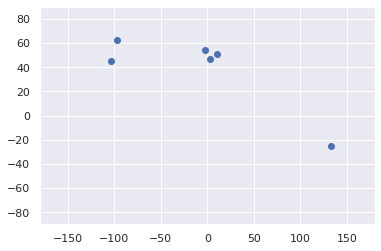

In [18]:
# Plot the Data

plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [19]:
x = data.iloc[:,1:3] # 1t for rows and second for columns
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [21]:
# Clustering

kmeans = KMeans(3)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
# Clustering Results

identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 2, 0, 0, 0, 1], dtype=int32)

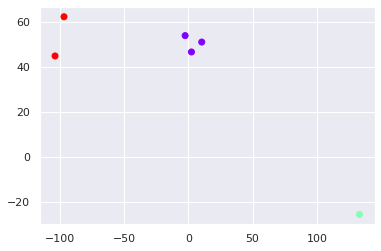

In [24]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Clusters'],cmap='rainbow')

Text(0, 0.5, 'WCSS')

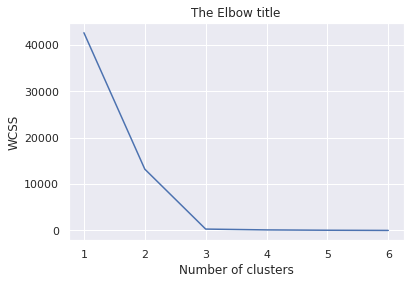

In [28]:
# WCSS and Elbow Method
# WCSS is the sum of squared distance between each point and teh centroid in a cluster
# Elbow method is used to determine the optimal number of clusters after distortion/inertia start decreasing in a linear fashion

wcss=[]
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(x)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')